In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline  
import pickle
import re
from datetime import datetime
import dateutil.parser
import pylab
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%load_ext base16_mplrc
%base16_mplrc light

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload

                     Could not detect base-16 ipython notebook theme. Download base16 theme notebook theme
                     from https://github.com/nsonnad/base16-ipython-notebook . Using 'default' theme.
Setting plotting theme to default-light. Palette available in b16_colors


Opening pickle file containing complete datset scraped from boxofficemojo

In [4]:
with open("franchise_data.pkl", 'rb') as picklefile:
    complete_data_for_pandas = pickle.load(picklefile)

In [5]:
print (complete_data_for_pandas[8])

{'distrib': 'Weinstein / Dimension', 'budget': 40000000.0, 'domestic_total_gross': 39317800, 'title': 'Scream 4', 'release_date': numpy.datetime64('2011-04-15'), 'metacritic': 52.0, 'director': 'Wes Craven', 'franchise': 'scream', 'rating': 'R', 'genre': 'Horror', 'runtime': 103, 'oscars': 0}


At this point, I have 725 movies belonging to 151 franchises

In [6]:
df_complete = pd.DataFrame(complete_data_for_pandas)

'title',
'domestic_total_gross',
'release_date',
'runtime',
'rating',
'budget',
'genre',
'distrib',
'oscars'

In [7]:
sorted_df = df_complete.sort(columns='release_date')
clean_df = sorted_df[pd.notnull(sorted_df['release_date'])]

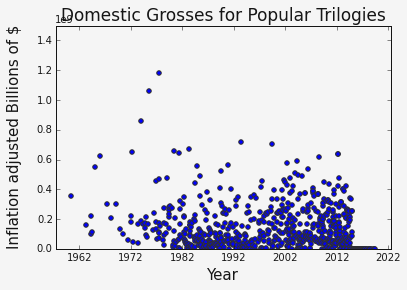

In [8]:
plt.scatter(clean_df.release_date.values, clean_df.domestic_total_gross)
plt.title('Domestic Grosses for Popular Trilogies', fontsize=17);
plt.xlabel("Year", fontsize=15, labelpad=5);  
plt.ylim(0, 1.5*10**9)
plt.ylabel("Inflation adjusted Billions of $", fontsize=15, labelpad=15);
plt.show()

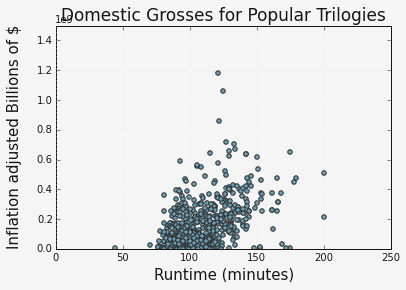

In [9]:
clean_df.plot(x='runtime',y='domestic_total_gross', kind='scatter')
plt.title('Domestic Grosses for Popular Trilogies', fontsize=17);
plt.xlabel("Runtime (minutes)", fontsize=15, labelpad=5);
plt.ylim(0, 1.5*10**9)
# plt.axis([50,200,0,1.5*10**9])
plt.ylabel("Inflation adjusted Billions of $", fontsize=15, labelpad=15);
plt.show()

In [10]:
rating_groups = clean_df.dropna(subset=['budget']).groupby('rating')
summed_rating_groups = rating_groups.sum()   
numberpercat = rating_groups.size()
avgs = summed_rating_groups.div(numberpercat,axis=0)

print(avgs)

              budget  domestic_total_gross  metacritic    oscars     runtime
rating                                                                      
G       4.878571e+07          1.562614e+08   29.000000  0.214286   92.000000
PG      7.252267e+07          2.566584e+08   52.866667  0.360000  106.573333
PG-13   1.099481e+08          2.426798e+08   51.603896  0.292208  119.701299
R       3.726552e+07          1.080283e+08   41.275862  0.103448  105.172414


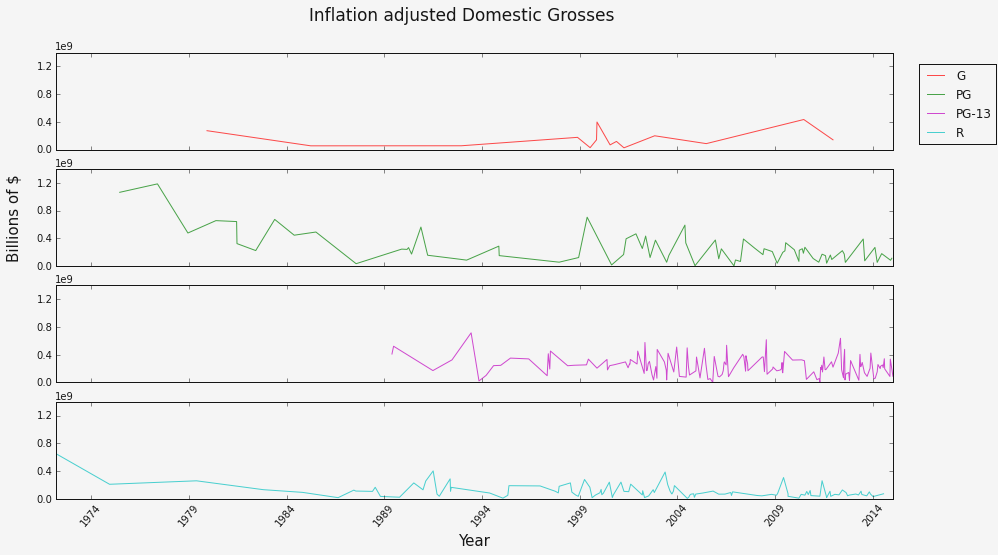

In [11]:
col_list = ['r', 'g','m','c']
fig, ax = plt.subplots(nrows=4, ncols=1,sharex=True, figsize=(15, 8))
fig.suptitle('Inflation adjusted Domestic Grosses', fontsize=17)
lines = []
labels = []
for (idx, (grp, val)) in enumerate(rating_groups):
    l1, = ax[idx].plot(val.release_date.values,
           val.domestic_total_gross,  
           color=col_list[idx], 
           label=grp, alpha=0.7)
    ax[idx].set_ylim([0, 1.4*10**9])
    ax[idx].yaxis.set_ticks(np.arange(0,1.4*10**9, 0.4*10**9))
    
    lines.append(l1)
    labels.append(str(grp))
    
plt.xticks(rotation=50)

# fig.xlabel("Year", fontsize=15, labelpad=5);
# plt.ylabel("Millions of $", fontsize=15, labelpad=15)

ax[3].set_xlabel('Year', fontsize=15, labelpad=5)
ax[1].set_ylabel('Billions of $', fontsize=15, labelpad=15)
fig.legend(lines, labels, loc = (0.92, 0.74))

In [12]:
# directors_df = pd.DataFrame(dir)
df_cleaned_dir = df_complete[pd.notnull(df_complete['director'])]
grouped_dir = df_cleaned_dir.groupby('director')
summed_dir = grouped_dir.sum()
movieperdir = grouped_dir.size()

gross_per_movie = summed_dir.div(movieperdir,axis=0)

print( gross_per_movie.sort(columns='domestic_total_gross', ascending=False)['domestic_total_gross'][:10])

director
William Friedkin                           8.566310e+08
George Lucas                               7.032106e+08
Joss Whedon                                6.371762e+08
Andrew AdamsonKelly AsburyConrad Vernon    5.897227e+08
Steven Spielberg                           5.792778e+08
Martin Brest                               5.573451e+08
Christopher Nolan                          4.534715e+08
Gore Verbinski                             4.433616e+08
Chris Columbus                             4.366062e+08
Lee Unkrich                                4.332755e+08
Name: domestic_total_gross, dtype: float64


#### Challenge 6

This wasn't really applicable to my dataset, and couldn't cut on datetime objects... 

#### Challenge 1

coefficient:	 3.68078e+06
intercept:	 -2.42418e+08
R^2:      	 0.265047


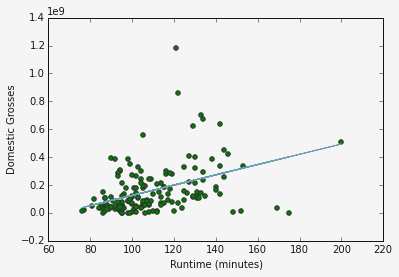

In [13]:
# import statsmodels.formula.api as sm
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression


budget_df = df_complete[pd.notnull(df_complete['runtime'])]
var_lab = list(budget_df.columns.values)

train, test = train_test_split(budget_df, test_size = 0.25)

train_df = pd.DataFrame(train,columns=var_lab) 
test_df = pd.DataFrame(test,columns=var_lab) 


X_train = train_df[['runtime']]
Y_train = train_df[['domestic_total_gross']]

X_test = test_df[['runtime']]
Y_test = test_df[['domestic_total_gross']]

sk_linmodel = LinearRegression()
sk_linmodel.fit(X_train,Y_train)

print( 'coefficient:\t %g'% sk_linmodel.coef_)
print( 'intercept:\t %g'  % sk_linmodel.intercept_)
print( 'R^2:      \t %g'  % sk_linmodel.score(X_train, Y_train))

plt.scatter(X_test, Y_test , c='green')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Domestic Grosses')
plt.plot(X_test, sk_linmodel.predict(X_test))

#### Challenge 2

[[  9.35481574e-01   5.39952086e+05]]
[-48592418.56595221]
0.812258796062


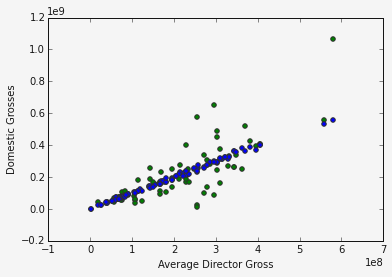

In [14]:
# import statsmodels.formula.api as sm
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression

avg_dir_gross = gross_per_movie.domestic_total_gross
avg_dir_gross.name = 'avg_dir_gross'

director_df = df_complete[pd.notnull(df_complete['director'])]
ddf = director_df.copy()
ddf['avg_dir_gross'] = director_df.apply(lambda row: avg_dir_gross[row['director']], axis=1)


# budget_df = df_complete[pd.notnull(df_complete['runtime'])]
var_lab = list(ddf.columns.values)

train, test = train_test_split(ddf, test_size = 0.25)

train_df = pd.DataFrame(train,columns=var_lab) 
test_df = pd.DataFrame(test,columns=var_lab) 


X_train = train_df[['avg_dir_gross', 'runtime']]
Y_train = train_df[['domestic_total_gross']]

X_test = test_df[['avg_dir_gross','runtime']]
Y_test = test_df[['domestic_total_gross']]

sk_linmodel = LinearRegression()
sk_linmodel.fit(X_train,Y_train)

print (sk_linmodel.coef_)
print (sk_linmodel.intercept_)
print  (sk_linmodel.score(X_train, Y_train))

plt.scatter(X_test['avg_dir_gross'], Y_test , c='green')
plt.xlabel('Average Director Gross')
plt.ylabel('Domestic Grosses')
plt.scatter(X_test['avg_dir_gross'], sk_linmodel.predict(X_test))

It's doing a good job because of the focused nature of my dataset. These film franchises often retain the same director...

## Linear Regression Challenges 2

#### Challenge 1

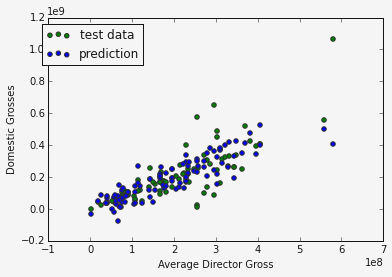

In [15]:
# Using the coefficients from the regression above

# print X_test.head()

resids = sk_linmodel.predict(X_train) - Y_train

B1, B2 = sk_linmodel.coef_[0]

def pred_gross(avg_dir_gross,runtime):
    prediction = sk_linmodel.predict([avg_dir_gross,runtime])[0] + np.random.normal(0,resids.std())
    return prediction

x_list = zip(X_test['avg_dir_gross'].values,X_test['runtime'].values)

y_pred = [pred_gross(x[0],x[1]) for x in x_list]

plt.scatter(X_test['avg_dir_gross'], Y_test , c='green', label="test data")
plt.xlabel('Average Director Gross')
plt.ylabel('Domestic Grosses')
plt.scatter(X_test['avg_dir_gross'].values,y_pred, label="prediction")
plt.legend(bbox_to_anchor=(0.3, 1))

#### Challenge 2

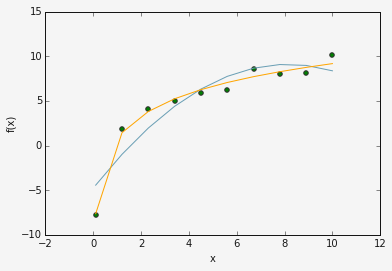

In [16]:
import math

from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.feature_extraction import DictVectorizer as dv

def gen_epsilon():
    return np.random.normal(0,1)

def make_log_data(X):
    B_0 = 1
    B_1 = 4
    return B_0 + B_1 * math.log(X) + gen_epsilon()

vlog = np.vectorize(make_log_data)

X_data = np.linspace(0.1,10,10) 
Y_data = vlog(X_data)



polyfit = PolynomialFeatures(degree=2,include_bias=False)
X_poly_fit = polyfit.fit_transform(X_data.reshape(-1, 1))

X_log_fit = [[math.log(X)] for X in X_data]

glf = linear_model.LinearRegression()
glf.fit(X_poly_fit, Y_data)

llf = linear_model.LinearRegression()
llf.fit(X_log_fit, Y_data)


plt.scatter(X_data, Y_data, c='green')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(X_data, glf.predict(X_poly_fit))
plt.plot(X_data, llf.predict(X_log_fit) ,'orange')

#### Challenge 3

In [17]:
from sklearn.metrics import mean_squared_error
training_mse = mean_squared_error(Y_train.astype('float64').values, sk_linmodel.predict(X_train).astype('float64'))
testing_mse = mean_squared_error(Y_test.astype('float64').values, sk_linmodel.predict(X_test).astype('float64'))
print (training_mse, testing_mse)

4.95907918456e+15 9.59088991757e+15


#### Challenge 4

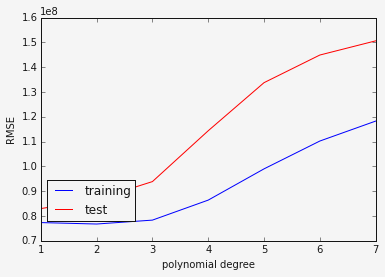

In [18]:
var_lab = list(ddf.columns.values)

train, test = train_test_split(ddf, test_size = 0.25)

train_df = pd.DataFrame(train,columns=var_lab) 
test_df = pd.DataFrame(test,columns=var_lab) 

X_tr = train_df[['avg_dir_gross']]
Y_tr = train_df[['domestic_total_gross']]

X_te = test_df[['avg_dir_gross']]
Y_te = test_df[['domestic_total_gross']]

train_error = []
test_error = []

highest_degree_poly = 8

for i in range(1,highest_degree_poly):
    polyfit = PolynomialFeatures(degree= i ,include_bias=False)
    X_poly_tr = polyfit.fit_transform(X_tr.values)
    glf = linear_model.LinearRegression()
    glf.fit(X_poly_tr, Y_tr)
    train_error.append(math.sqrt(mean_squared_error(Y_tr.astype('float64').values, glf.predict(X_poly_tr).astype('float64'))))
    
    X_poly_te = polyfit.fit_transform(X_te.values)

    test_error.append(math.sqrt(mean_squared_error(Y_te.astype('float64').values, glf.predict(X_poly_te).astype('float64'))))

    
plt.plot(range(1,highest_degree_poly),train_error,label="training", color = 'b')
plt.plot(range(1,highest_degree_poly),test_error,label="test", color = 'r')
plt.xlabel('polynomial degree')
plt.ylabel('RMSE')
plt.legend(bbox_to_anchor=(0.3, 0.3))

### Challenge 5

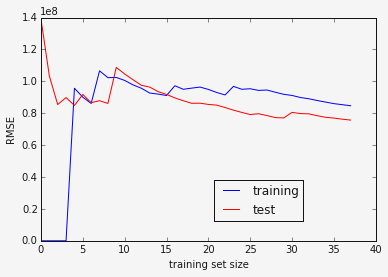

In [19]:
var_lab = list(ddf.columns.values)

train, test = train_test_split(ddf, test_size = 0.30)

train_df = pd.DataFrame(train,columns=var_lab) 
test_df = pd.DataFrame(test,columns=var_lab) 

X_train = train_df['avg_dir_gross']
Y_train = train_df['domestic_total_gross'].astype('float64')
X_test = test_df['avg_dir_gross']
Y_test = test_df['domestic_total_gross'].astype('float64')

step_size = 3

def compute_errors(X_set,Y_set):
    
    X_toadd = X_set
    Y_toadd = Y_set
    
    X_act = []
    Y_act = []
    error= []
    
    while len(X_toadd)>step_size:
        X_act.append(X_toadd[:step_size])
        X_toadd = X_toadd[step_size:]
        Y_act.append(Y_toadd[:step_size])
        Y_toadd = Y_toadd[step_size:]
        polyfit = PolynomialFeatures(degree= 1 ,include_bias=False)
        X_poly_tr = polyfit.fit_transform(X_act)
        glf = linear_model.LinearRegression()
        glf.fit(X_poly_tr, Y_act)
        error.append(math.sqrt(mean_squared_error(Y_act, glf.predict(X_poly_tr).astype('float64'))))
    return glf, error


fit_glf, training = compute_errors(X_train,Y_train)


X_toadd = X_test
Y_toadd = Y_test
    
X_act = []
Y_act = []
testing= []

while len(X_toadd)>step_size:
    X_act.append(X_toadd[:step_size])
    X_toadd = X_toadd[step_size:]
    Y_act.append(Y_toadd[:step_size])
    Y_toadd = Y_toadd[step_size:]
    polyfit = PolynomialFeatures(degree= 1 ,include_bias=False)
    X_poly_tr = polyfit.fit_transform(X_act)
    testing.append(math.sqrt(mean_squared_error(Y_act, fit_glf.predict(X_poly_tr).astype('float64'))))

plt.plot(range(len(testing)),training[:len(testing)],label="training", color = 'b')
plt.plot(range(len(testing)),testing,label="test", color = 'r')
plt.xlabel('training set size')
plt.ylabel('RMSE')
plt.legend(bbox_to_anchor=(0.8, 0.3))